In [169]:
import pandas as pd
import numpy as np

In [170]:
# till now
# Timestamp
time_stamp = pd.Timestamp('2024/10/16 4:40')
time_stamp

Timestamp('2024-10-16 04:40:00')

In [171]:
time_stamp.hour

4

In [172]:
# DatetimeIndex --> df and series index
pd.DatetimeIndex([pd.Timestamp('2024/1/1'), pd.Timestamp('2024/1/10'), pd.Timestamp('2024/1/5')])

DatetimeIndex(['2024-01-01', '2024-01-10', '2024-01-05'], dtype='datetime64[ns]', freq=None)

In [173]:
# date_range()
pd.date_range(start='2024/1/1', end='2024/1/31', freq='D')

DatetimeIndex(['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04',
               '2024-01-05', '2024-01-06', '2024-01-07', '2024-01-08',
               '2024-01-09', '2024-01-10', '2024-01-11', '2024-01-12',
               '2024-01-13', '2024-01-14', '2024-01-15', '2024-01-16',
               '2024-01-17', '2024-01-18', '2024-01-19', '2024-01-20',
               '2024-01-21', '2024-01-22', '2024-01-23', '2024-01-24',
               '2024-01-25', '2024-01-26', '2024-01-27', '2024-01-28',
               '2024-01-29', '2024-01-30', '2024-01-31'],
              dtype='datetime64[ns]', freq='D')

In [174]:
# to_datetime()
s = pd.Series(['2024/10/16', '2024/10/17', '2024/10/18', '2024/10/19', '2024/10/20'])
dt_created = pd.to_datetime(s, errors='coerce')
dt_created

0   2024-10-16
1   2024-10-17
2   2024-10-18
3   2024-10-19
4   2024-10-20
dtype: datetime64[ns]

In [175]:
dt_created.dt.day_name()

0    Wednesday
1     Thursday
2       Friday
3     Saturday
4       Sunday
dtype: object

# Timedelta Object
Represents a duration, the difference between two dates or times

In [176]:
# create using Timestamp objects
t1 = pd.Timestamp('16th October 2024 4:40:15')
t2 = pd.Timestamp('20th October 2024 10:00:00')

t2 - t1

Timedelta('4 days 05:19:45')

In [177]:
# standalone creation
pd.Timedelta(days=2, hours=10, minutes=25, seconds=1)

Timedelta('2 days 10:25:01')

In [178]:
# Arithmetic
t1

Timestamp('2024-10-16 04:40:15')

In [179]:
t1 + pd.Timedelta(days=2, hours=10, minutes=25, seconds=1)

Timestamp('2024-10-18 15:05:16')

In [180]:
# works on proper set of timestamps
pd.date_range(start='2024-10-1', end='2024/10/31', freq='D')

DatetimeIndex(['2024-10-01', '2024-10-02', '2024-10-03', '2024-10-04',
               '2024-10-05', '2024-10-06', '2024-10-07', '2024-10-08',
               '2024-10-09', '2024-10-10', '2024-10-11', '2024-10-12',
               '2024-10-13', '2024-10-14', '2024-10-15', '2024-10-16',
               '2024-10-17', '2024-10-18', '2024-10-19', '2024-10-20',
               '2024-10-21', '2024-10-22', '2024-10-23', '2024-10-24',
               '2024-10-25', '2024-10-26', '2024-10-27', '2024-10-28',
               '2024-10-29', '2024-10-30', '2024-10-31'],
              dtype='datetime64[ns]', freq='D')

In [181]:
pd.date_range(start='2024-10-1', end='2024/10/31', freq='D') - pd.Timedelta(days=2, hours=10, minutes=12, seconds=1)

DatetimeIndex(['2024-09-28 13:47:59', '2024-09-29 13:47:59',
               '2024-09-30 13:47:59', '2024-10-01 13:47:59',
               '2024-10-02 13:47:59', '2024-10-03 13:47:59',
               '2024-10-04 13:47:59', '2024-10-05 13:47:59',
               '2024-10-06 13:47:59', '2024-10-07 13:47:59',
               '2024-10-08 13:47:59', '2024-10-09 13:47:59',
               '2024-10-10 13:47:59', '2024-10-11 13:47:59',
               '2024-10-12 13:47:59', '2024-10-13 13:47:59',
               '2024-10-14 13:47:59', '2024-10-15 13:47:59',
               '2024-10-16 13:47:59', '2024-10-17 13:47:59',
               '2024-10-18 13:47:59', '2024-10-19 13:47:59',
               '2024-10-20 13:47:59', '2024-10-21 13:47:59',
               '2024-10-22 13:47:59', '2024-10-23 13:47:59',
               '2024-10-24 13:47:59', '2024-10-25 13:47:59',
               '2024-10-26 13:47:59', '2024-10-27 13:47:59',
               '2024-10-28 13:47:59'],
              dtype='datetime64[ns]', freq='D'

In [182]:
# real life example
df = pd.read_csv('deliveries.csv')
df.head()

,order_date,delivery_date
0,5/24/98,2/5/99
1,4/22/92,3/6/98
2,2/10/91,8/26/92
3,7/21/92,11/20/97
4,9/2/93,6/10/98


In [183]:
# average delivery time of this dataset
# studying dataset
df.shape

(501, 2)

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order_date     501 non-null    object
 1   delivery_date  501 non-null    object
dtypes: object(2)
memory usage: 8.0+ KB


In [185]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['delivery_date'] = pd.to_datetime(df['delivery_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_date     501 non-null    datetime64[ns]
 1   delivery_date  501 non-null    datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 8.0 KB


C:\Users\15105\AppData\Local\Temp\ipykernel_27248\1986493186.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['order_date'] = pd.to_datetime(df['order_date'])
C:\Users\15105\AppData\Local\Temp\ipykernel_27248\1986493186.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['delivery_date'] = pd.to_datetime(df['delivery_date'])


In [186]:
df['delivery_time_period'] = df['delivery_date'] - df['order_date']
df.head()

,order_date,delivery_date,delivery_time_period
0,1998-05-24,1999-02-05,257 days
1,1992-04-22,1998-03-06,2144 days
2,1991-02-10,1992-08-26,563 days
3,1992-07-21,1997-11-20,1948 days
4,1993-09-02,1998-06-10,1742 days


In [187]:
df['delivery_time_period'].mean()

Timedelta('1217 days 22:53:53.532934128')

# Time Series
A time series is a data set that tracks a sample over time. In particular, a time series allows one ot see what factors influence certain variables from period to period. Time series analysis can be useful to  see how a given asses, security, or economic variable changes over time
Examples
- Financial Data (Company stocks)
- Natural Data (Rainfall measurement)
- Event Data (Covid)
- Medical Data (Heart rate monitoring)

Types of Operations done on Time Series
- Time Series Analysis
- Time Series Forecasting

In [188]:
google = pd.read_csv('google.csv')
print(google.shape)
google.head()

(4471, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
3,2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276


In [189]:
google.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4466,2022-05-16,2307.679932,2332.149902,2286.699951,2295.850098,2295.850098,1164100
4467,2022-05-17,2344.550049,2344.550049,2306.750000,2334.030029,2334.030029,1078800
4468,2022-05-18,2304.750000,2313.913086,2242.840088,2248.020020,2248.020020,1399100
4469,2022-05-19,2236.820068,2271.750000,2209.360107,2214.909912,2214.909912,1459600
4470,2022-05-20,2241.709961,2251.000000,2127.459961,2186.260010,2186.260010,1878100


In [190]:
youtube = pd.read_csv('Youtube_dataset_all_dataScience_channels.csv')
print(youtube.shape)
youtube.head()

(23002, 6)


,Channel_Name,Title,Published_date,Views,Like_count,Comment_Count
0,Rishabh Mishra,POWER BI Full PROJECT for Data Analysis with P...,2024-04-20,157284.0,5575.0,632.0
1,Rishabh Mishra,AI Revolution - Future of Data Analyst Jobs & ...,2024-03-23,78155.0,2712.0,245.0
2,Rishabh Mishra,Reality of Data Analyst Courses and Data Scien...,2024-03-16,43627.0,1285.0,267.0
3,Rishabh Mishra,Personal Portfolio Website for Beginners | How...,2024-01-21,129956.0,3462.0,358.0
4,Rishabh Mishra,How To Create LinkedIn Profile in 2024 | Linke...,2024-01-17,143309.0,3389.0,192.0


In [191]:
yt = youtube[['Published_date', 'Views', 'Comment_Count']]
yt.head()

,Published_date,Views,Comment_Count
0,2024-04-20,157284.0,632.0
1,2024-03-23,78155.0,245.0
2,2024-03-16,43627.0,267.0
3,2024-01-21,129956.0,358.0
4,2024-01-17,143309.0,192.0


In [192]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4471 entries, 0 to 4470
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4471 non-null   object 
 1   Open       4471 non-null   float64
 2   High       4471 non-null   float64
 3   Low        4471 non-null   float64
 4   Close      4471 non-null   float64
 5   Adj Close  4471 non-null   float64
 6   Volume     4471 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 244.6+ KB


In [193]:
yt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23002 entries, 0 to 23001
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Published_date  23002 non-null  object 
 1   Views           23000 non-null  float64
 2   Comment_Count   22975 non-null  float64
dtypes: float64(2), object(1)
memory usage: 539.2+ KB


In [194]:
google['Date'] = pd.to_datetime(google['Date'])
yt['Published_date'] = pd.to_datetime(yt['Published_date'])
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4471 entries, 0 to 4470
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4471 non-null   datetime64[ns]
 1   Open       4471 non-null   float64       
 2   High       4471 non-null   float64       
 3   Low        4471 non-null   float64       
 4   Close      4471 non-null   float64       
 5   Adj Close  4471 non-null   float64       
 6   Volume     4471 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 244.6 KB


C:\Users\15105\AppData\Local\Temp\ipykernel_27248\4142369097.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yt['Published_date'] = pd.to_datetime(yt['Published_date'])


In [195]:
yt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23002 entries, 0 to 23001
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Published_date  23002 non-null  datetime64[ns]
 1   Views           23000 non-null  float64       
 2   Comment_Count   22975 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 539.2 KB


In [196]:
yt.sort_index(ascending=False, inplace=True)
yt.head()

C:\Users\15105\AppData\Local\Temp\ipykernel_27248\1756431959.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yt.sort_index(ascending=False, inplace=True)


,Published_date,Views,Comment_Count
23001,2020-01-17,29074.0,140.0
23000,2020-01-21,8943.0,19.0
22999,2020-01-23,64571.0,229.0
22998,2020-01-25,15225.0,22.0
22997,2020-01-30,72678.0,64.0


In [197]:
google.set_index('Date').head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276


In [198]:
google.set_index('Date', inplace=True)
yt.set_index('Published_date', inplace=True)

In [199]:
yt.head()

,Views,Comment_Count
Published_date,,
2020-01-17,29074.0,140.0
2020-01-21,8943.0,19.0
2020-01-23,64571.0,229.0
2020-01-25,15225.0,22.0
2020-01-30,72678.0,64.0


In [200]:
yt.tail()

,Views,Comment_Count
Published_date,,
2024-01-17,143309.0,192.0
2024-01-21,129956.0,358.0
2024-03-16,43627.0,267.0
2024-03-23,78155.0,245.0
2024-04-20,157284.0,632.0


In [201]:
# fetch a specific date
yt.loc['2022-12-31']

,Views,Comment_Count
Published_date,,
2022-12-31,3208.0,11.0
2022-12-31,490864.0,413.0
2022-12-31,1038982.0,987.0
2022-12-31,12418.0,20.0
2022-12-31,25059.0,177.0
2022-12-31,171997.0,736.0


In [202]:
# this will gave an error when we give a weekend date because stock market will be closed on that day
google.loc['2021-12-31']

Open           2910.879883
High           2927.300049
Low            2893.550049
Close          2893.590088
Adj Close      2893.590088
Volume       864900.000000
Name: 2021-12-31 00:00:00, dtype: float64

In [203]:
# partial indexing -> select a particular year/month
# 2022 december -> whole month data
yt.loc['2022-12']

,Views,Comment_Count
Published_date,,
2022-12-06,46215.0,29.0
2022-12-13,35790.0,28.0
2022-12-17,5058.0,16.0
2022-12-20,156772.0,862.0
2022-12-27,7115.0,12.0
...,...,...
2022-12-12,1777.0,18.0
2022-12-17,111537.0,170.0
2022-12-22,3159.0,7.0


In [204]:
yt.loc['2022']

,Views,Comment_Count
Published_date,,
2022-01-04,497378.0,641.0
2022-01-10,3488.0,7.0
2022-01-11,159231.0,98.0
2022-01-18,22954.0,358.0
2022-01-25,114453.0,60.0
...,...,...
2022-12-12,1777.0,18.0
2022-12-17,111537.0,170.0
2022-12-22,3159.0,7.0


In [205]:
# create year month-name and day-name
yt['month_name'] = yt.index.month_name()
yt['weekday_name'] = yt.index.day_name()
yt['quarter'] = yt.index.quarter
yt.head()

C:\Users\15105\AppData\Local\Temp\ipykernel_27248\1668805143.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yt['month_name'] = yt.index.month_name()
C:\Users\15105\AppData\Local\Temp\ipykernel_27248\1668805143.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yt['weekday_name'] = yt.index.day_name()
C:\Users\15105\AppData\Local\Temp\ipykernel_27248\1668805143.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

,Views,Comment_Count,month_name,weekday_name,quarter
Published_date,,,,,
2020-01-17,29074.0,140.0,January,Friday,1
2020-01-21,8943.0,19.0,January,Tuesday,1
2020-01-23,64571.0,229.0,January,Thursday,1
2020-01-25,15225.0,22.0,January,Saturday,1
2020-01-30,72678.0,64.0,January,Thursday,1


In [206]:
google['month_name'] = google.index.month_name()
google['weekday_name'] = google.index.day_name()
google['quarter'] = google.index.quarter
google.head()

,Open,High,Low,Close,Adj Close,Volume,month_name,weekday_name,quarter
Date,,,,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361,August,Thursday,3
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874,August,Friday,3
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897,August,Monday,3
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808,August,Tuesday,3
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276,August,Wednesday,3


In [207]:
# slicing
google.loc['2020-03-23':'2020-3-26']

,Open,High,Low,Close,Adj Close,Volume,month_name,weekday_name,quarter
Date,,,,,,,,,
2020-03-23,1061.319946,1071.319946,1013.536011,1056.619995,1056.619995,4044100,March,Monday,1
2020-03-24,1103.770020,1135.000000,1090.619995,1134.459961,1134.459961,3344500,March,Tuesday,1
2020-03-25,1126.469971,1148.900024,1086.010010,1102.489990,1102.489990,4081500,March,Wednesday,1
2020-03-26,1111.800049,1169.969971,1093.530029,1161.750000,1161.750000,3571700,March,Thursday,1


In [208]:
google.tail()

,Open,High,Low,Close,Adj Close,Volume,month_name,weekday_name,quarter
Date,,,,,,,,,
2022-05-16,2307.679932,2332.149902,2286.699951,2295.850098,2295.850098,1164100,May,Monday,2
2022-05-17,2344.550049,2344.550049,2306.750000,2334.030029,2334.030029,1078800,May,Tuesday,2
2022-05-18,2304.750000,2313.913086,2242.840088,2248.020020,2248.020020,1399100,May,Wednesday,2
2022-05-19,2236.820068,2271.750000,2209.360107,2214.909912,2214.909912,1459600,May,Thursday,2
2022-05-20,2241.709961,2251.000000,2127.459961,2186.260010,2186.260010,1878100,May,Friday,2


In [209]:
# challenge -> fetch info for a particular date every year -> limitation of timedelta
pd.date_range(start='2005-1-6', end='2022-1-6', freq=pd.Timedelta(days=365))

DatetimeIndex(['2005-01-06', '2006-01-06', '2007-01-06', '2008-01-06',
               '2009-01-05', '2010-01-05', '2011-01-05', '2012-01-05',
               '2013-01-04', '2014-01-04', '2015-01-04', '2016-01-04',
               '2017-01-03', '2018-01-03', '2019-01-03', '2020-01-03',
               '2021-01-02', '2022-01-02'],
              dtype='datetime64[ns]', freq='365D')

In [210]:
pd.date_range(start='2005-1-6', end='2022-1-6', freq=pd.DateOffset(years=1))

DatetimeIndex(['2005-01-06', '2006-01-06', '2007-01-06', '2008-01-06',
               '2009-01-06', '2010-01-06', '2011-01-06', '2012-01-06',
               '2013-01-06', '2014-01-06', '2015-01-06', '2016-01-06',
               '2017-01-06', '2018-01-06', '2019-01-06', '2020-01-06',
               '2021-01-06', '2022-01-06'],
              dtype='datetime64[ns]', freq='<DateOffset: years=1>')

In [211]:
google[google.index.isin(pd.date_range(start='2005-1-6', end='2022-1-6', freq=pd.DateOffset(years=1)))]

,Open,High,Low,Close,Adj Close,Volume,month_name,weekday_name,quarter
Date,,,,,,,,,
2005-01-06,97.175758,97.584229,93.509506,93.922951,93.922951,20852067,January,Thursday,1
2006-01-06,227.581970,234.371521,225.773743,231.960556,231.960556,35646914,January,Friday,1
2009-01-06,165.868286,169.763687,162.585587,166.406265,166.406265,12898566,January,Tuesday,1
2010-01-06,311.761444,311.761444,302.047852,302.994293,302.994293,7987226,January,Wednesday,1
2011-01-06,304.199799,308.060303,303.885956,305.604523,305.604523,4131026,January,Thursday,1
2012-01-06,328.344299,328.767700,323.681763,323.796326,323.796326,5405987,January,Friday,1
2014-01-06,554.426880,557.340942,551.154114,556.573853,556.573853,3551864,January,Monday,1
2015-01-06,513.589966,514.761719,499.678131,500.585632,500.585632,2899940,January,Tuesday,1
2016-01-06,730.000000,747.179993,728.919983,743.619995,743.619995,1947000,January,Wednesday,1


<Axes: xlabel='Date'>

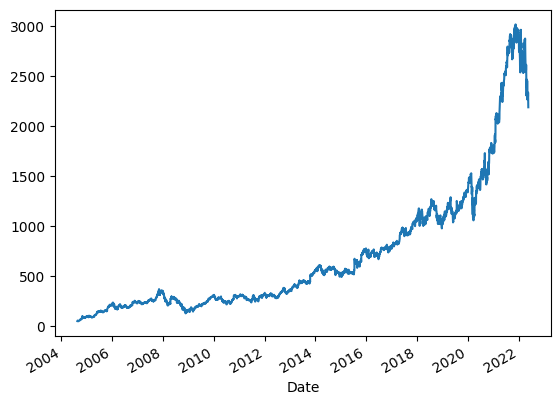

In [212]:
# visualising a single col
google['Close'].plot()

<Axes: xlabel='Published_date'>

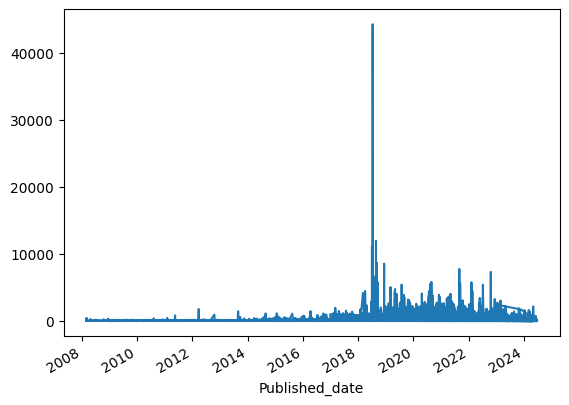

In [213]:
yt['Comment_Count'].plot()

In [214]:
yt.columns

Index(['Views', 'Comment_Count', 'month_name', 'weekday_name', 'quarter'], dtype='object')

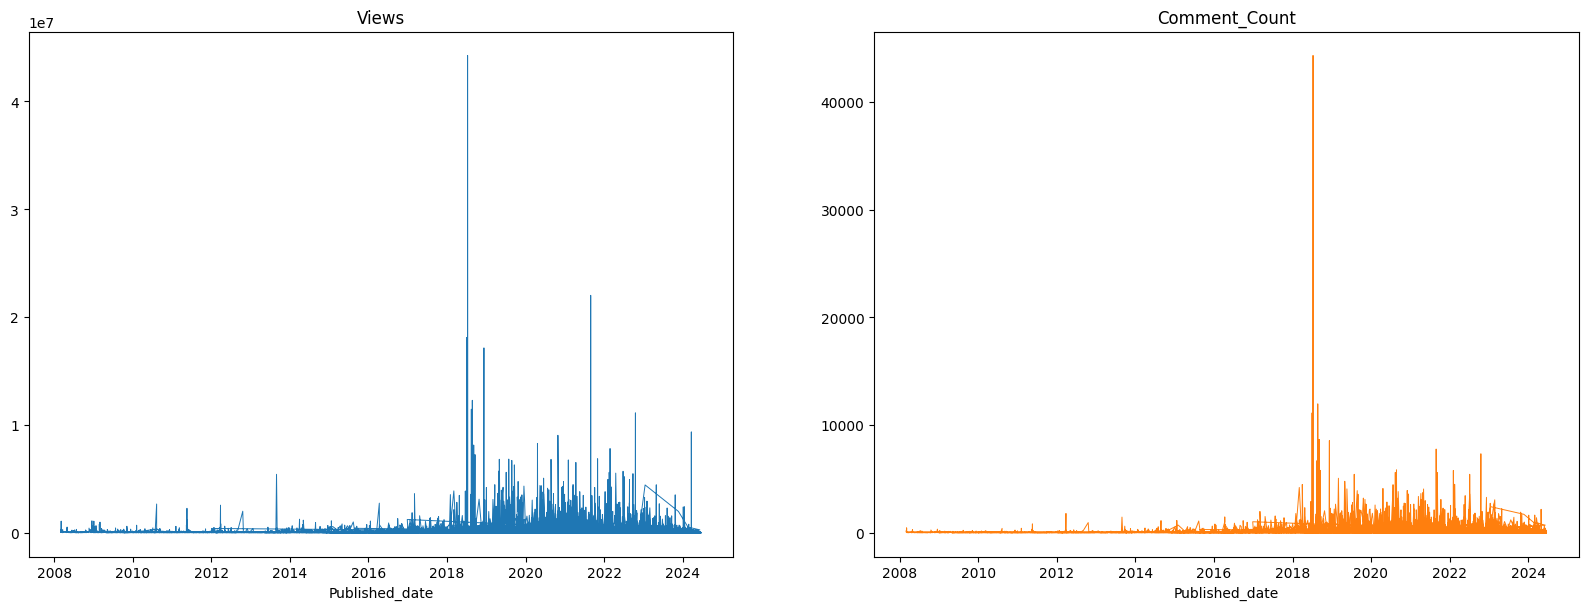

In [215]:
# viz all cols together
subset_yt = yt[['Views', 'Comment_Count']]
ax = subset_yt.plot(subplots=True,
             layout=(2, 2),
             sharex=False,
             sharey=False,
             linewidth=0.7,
             fontsize=10,
             legend = False,
             figsize=(20, 15),
             title=['Views', 'Comment_Count']
             )


<Axes: xlabel='Published_date'>

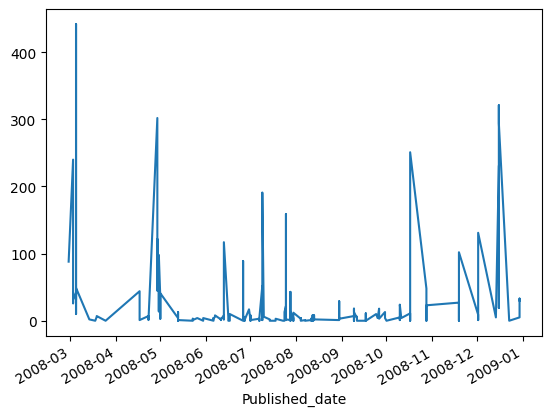

In [216]:
# plot for a particular year/month/week
yt.loc['2008']['Comment_Count'].plot()

<Axes: xlabel='Date'>

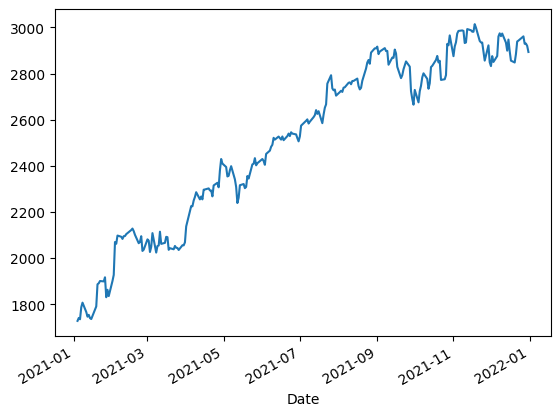

In [217]:
google.loc['2021']['Close'].plot()

<Axes: xlabel='Date'>

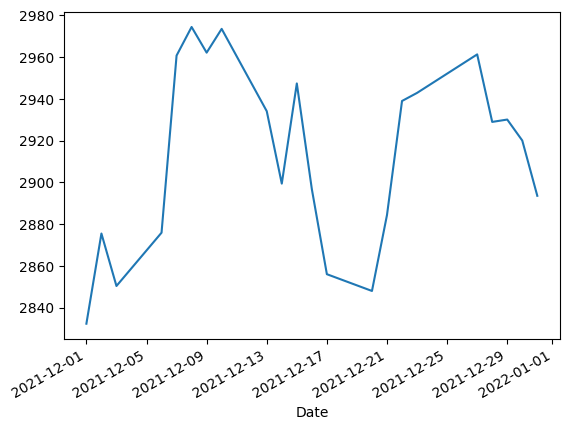

In [218]:
google.loc['2021-12']['Close'].plot()

<Axes: xlabel='Published_date'>

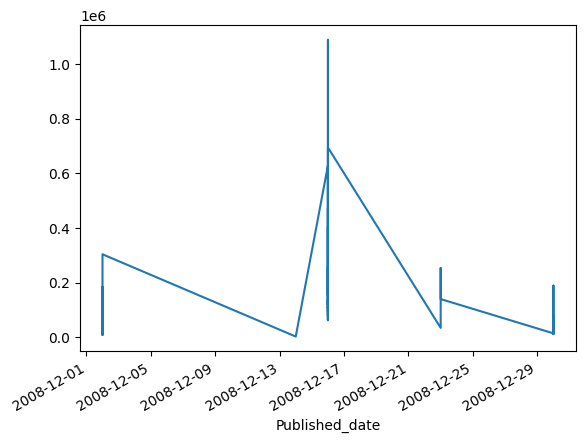

In [219]:
yt.loc['2008-12']['Views'].plot()

<Axes: xlabel='Date'>

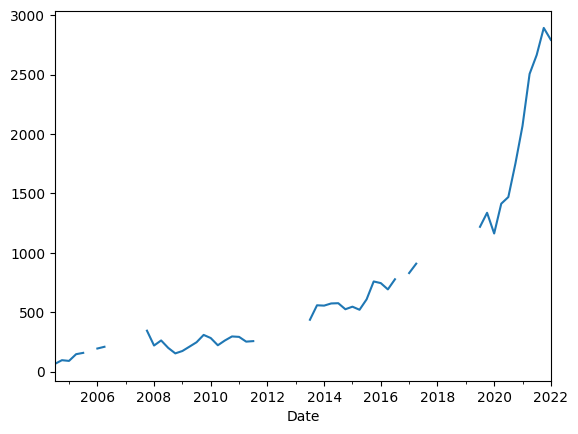

In [231]:
# quarterly trend
google['Close'].asfreq('QE').plot()

<Axes: xlabel='month_name'>

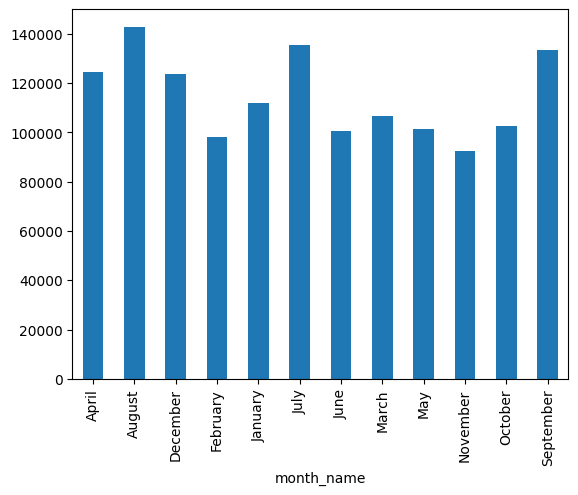

In [236]:
# monthly trend
yt.groupby('month_name')['Views'].mean().plot(kind='bar')

<Axes: xlabel='weekday_name'>

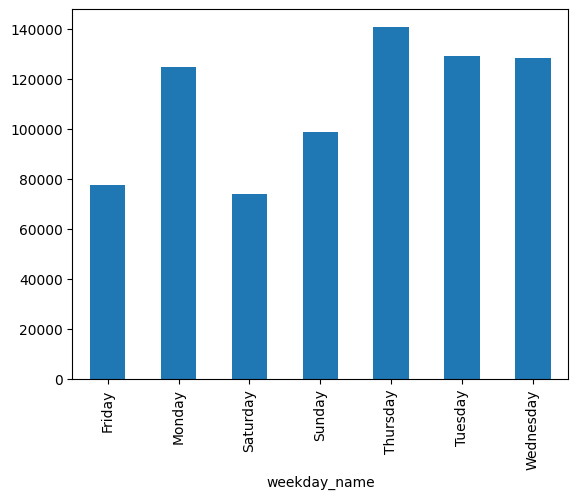

In [238]:
# yearly trend
yt.groupby('weekday_name')['Views'].mean().plot(kind='bar')

<Axes: xlabel='quarter'>

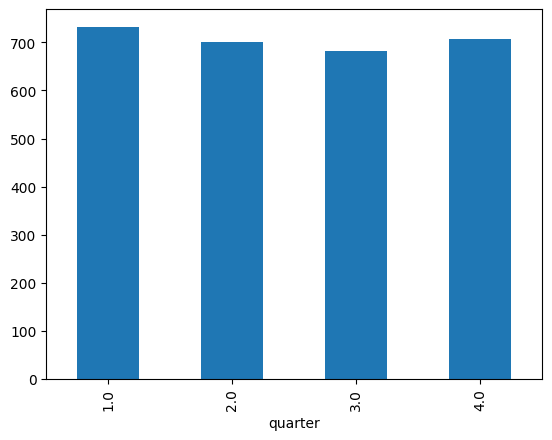

In [241]:
google.groupby('quarter')['Close'].mean().plot(kind='bar')

In [221]:
# frequency
yt.index

DatetimeIndex(['2020-01-17', '2020-01-21', '2020-01-23', '2020-01-25',
               '2020-01-30', '2020-02-06', '2020-02-11', '2020-02-14',
               '2020-02-19', '2020-02-24',
               ...
               '2023-09-17', '2023-09-20', '2023-09-23', '2023-11-04',
               '2024-01-13', '2024-01-17', '2024-01-21', '2024-03-16',
               '2024-03-23', '2024-04-20'],
              dtype='datetime64[ns]', name='Published_date', length=23002, freq=None)

In [222]:
google.index

DatetimeIndex(['2004-08-19', '2004-08-20', '2004-08-23', '2004-08-24',
               '2004-08-25', '2004-08-26', '2004-08-27', '2004-08-30',
               '2004-08-31', '2004-09-01',
               ...
               '2022-05-09', '2022-05-10', '2022-05-11', '2022-05-12',
               '2022-05-13', '2022-05-16', '2022-05-17', '2022-05-18',
               '2022-05-19', '2022-05-20'],
              dtype='datetime64[ns]', name='Date', length=4471, freq=None)

In [223]:
# as you can see above, the freq = None
# inserts NaN values in Saturday and Sunday
google = google.asfreq('B')
google.head()

,Open,High,Low,Close,Adj Close,Volume,month_name,weekday_name,quarter
Date,,,,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361.0,August,Thursday,3.0
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874.0,August,Friday,3.0
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897.0,August,Monday,3.0
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808.0,August,Tuesday,3.0
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276.0,August,Wednesday,3.0


In [224]:
google.asfreq('6h').head()

,Open,High,Low,Close,Adj Close,Volume,month_name,weekday_name,quarter
Date,,,,,,,,,
2004-08-19 00:00:00,49.813290,51.835709,47.800831,49.982655,49.982655,44871361.0,August,Thursday,3.0
2004-08-19 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-19 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-19 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-20 00:00:00,50.316402,54.336334,50.062355,53.952770,53.952770,22942874.0,August,Friday,3.0


In [225]:
# forward fill
google.asfreq('6h',method='ffill')

,Open,High,Low,Close,Adj Close,Volume,month_name,weekday_name,quarter
Date,,,,,,,,,
2004-08-19 00:00:00,49.813290,51.835709,47.800831,49.982655,49.982655,44871361.0,August,Thursday,3.0
2004-08-19 06:00:00,49.813290,51.835709,47.800831,49.982655,49.982655,44871361.0,August,Thursday,3.0
2004-08-19 12:00:00,49.813290,51.835709,47.800831,49.982655,49.982655,44871361.0,August,Thursday,3.0
2004-08-19 18:00:00,49.813290,51.835709,47.800831,49.982655,49.982655,44871361.0,August,Thursday,3.0
2004-08-20 00:00:00,50.316402,54.336334,50.062355,53.952770,53.952770,22942874.0,August,Friday,3.0
...,...,...,...,...,...,...,...,...,...
2022-05-19 00:00:00,2236.820068,2271.750000,2209.360107,2214.909912,2214.909912,1459600.0,May,Thursday,2.0
2022-05-19 06:00:00,2236.820068,2271.750000,2209.360107,2214.909912,2214.909912,1459600.0,May,Thursday,2.0
2022-05-19 12:00:00,2236.820068,2271.750000,2209.360107,2214.909912,2214.909912,1459600.0,May,Thursday,2.0


In [226]:
google.asfreq('6h', method='bfill')

,Open,High,Low,Close,Adj Close,Volume,month_name,weekday_name,quarter
Date,,,,,,,,,
2004-08-19 00:00:00,49.813290,51.835709,47.800831,49.982655,49.982655,44871361.0,August,Thursday,3.0
2004-08-19 06:00:00,50.316402,54.336334,50.062355,53.952770,53.952770,22942874.0,August,Friday,3.0
2004-08-19 12:00:00,50.316402,54.336334,50.062355,53.952770,53.952770,22942874.0,August,Friday,3.0
2004-08-19 18:00:00,50.316402,54.336334,50.062355,53.952770,53.952770,22942874.0,August,Friday,3.0
2004-08-20 00:00:00,50.316402,54.336334,50.062355,53.952770,53.952770,22942874.0,August,Friday,3.0
...,...,...,...,...,...,...,...,...,...
2022-05-19 00:00:00,2236.820068,2271.750000,2209.360107,2214.909912,2214.909912,1459600.0,May,Thursday,2.0
2022-05-19 06:00:00,2241.709961,2251.000000,2127.459961,2186.260010,2186.260010,1878100.0,May,Friday,2.0
2022-05-19 12:00:00,2241.709961,2251.000000,2127.459961,2186.260010,2186.260010,1878100.0,May,Friday,2.0


In [227]:
# asfreq
yt

,Views,Comment_Count,month_name,weekday_name,quarter
Published_date,,,,,
2020-01-17,29074.0,140.0,January,Friday,1
2020-01-21,8943.0,19.0,January,Tuesday,1
2020-01-23,64571.0,229.0,January,Thursday,1
2020-01-25,15225.0,22.0,January,Saturday,1
2020-01-30,72678.0,64.0,January,Thursday,1
...,...,...,...,...,...
2024-01-17,143309.0,192.0,January,Wednesday,1
2024-01-21,129956.0,358.0,January,Sunday,1
2024-03-16,43627.0,267.0,March,Saturday,1


# Resampling
Resampling involved changing the frequency of your time series observations

Two type if resampling are:

**Upsampling**: Where you increase the frequency of the samples, such as from minutes to seconds

**Downsampling**: Where you decrease the frequency of the samples, such as from days to months


<Axes: xlabel='Published_date'>

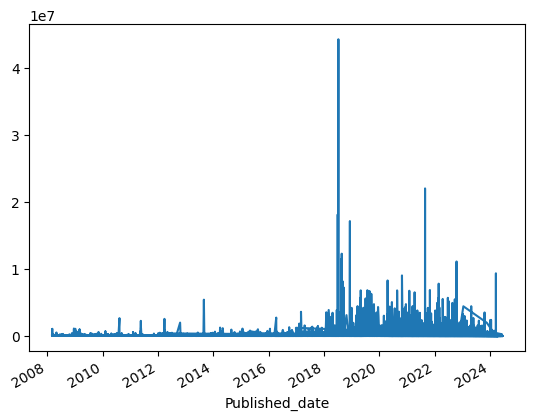

In [250]:
yt['Views'].plot()

<Axes: xlabel='Published_date'>

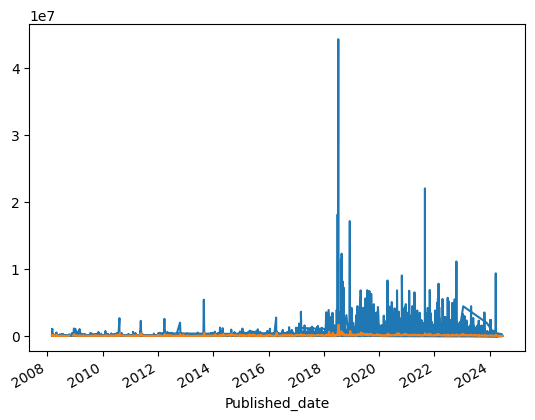

In [260]:
# Downsampling
yt['Views'].plot()
yt['Views'].resample('W').mean().plot()

<Axes: xlabel='Published_date'>

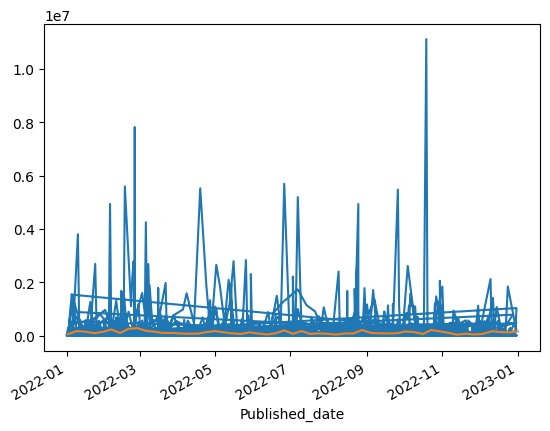

In [261]:
yt.loc['2022']['Views'].plot()
yt.loc['2022']['Views'].resample('W').mean().plot()

In [265]:
# upsampling
# search unsample interpolate for more method options

google['Close'].resample('h').interpolate(method='linear')

Date
2004-08-19 00:00:00      49.982655
2004-08-19 01:00:00      50.148076
2004-08-19 02:00:00      50.313498
2004-08-19 03:00:00      50.478919
2004-08-19 04:00:00      50.644341
                          ...     
2022-05-19 20:00:00    2191.034994
2022-05-19 21:00:00    2189.841248
2022-05-19 22:00:00    2188.647502
2022-05-19 23:00:00    2187.453756
2022-05-20 00:00:00    2186.260010
Freq: h, Name: Close, Length: 155593, dtype: float64

In [266]:
# polynomial
google['Close'].resample('h').interpolate(method='spline', order=2)

Date
2004-08-19 00:00:00      49.982655
2004-08-19 01:00:00      50.054174
2004-08-19 02:00:00      50.278766
2004-08-19 03:00:00      50.499453
2004-08-19 04:00:00      50.716235
                          ...     
2022-05-19 20:00:00    2116.145684
2022-05-19 21:00:00    2130.864097
2022-05-19 22:00:00    2147.454745
2022-05-19 23:00:00    2165.917626
2022-05-20 00:00:00    2186.260010
Freq: h, Name: Close, Length: 155593, dtype: float64

<Axes: xlabel='Date'>

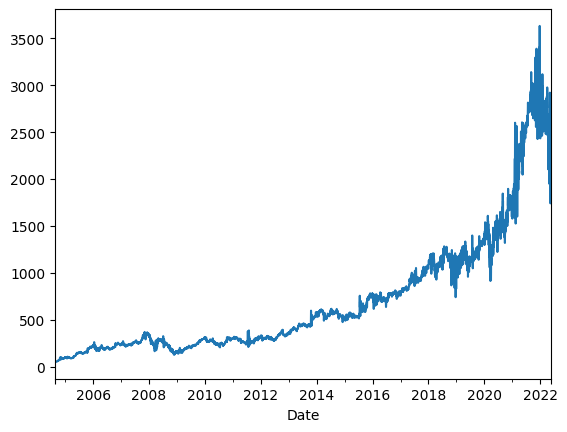

In [267]:
google['Close'].resample('h').interpolate(method='spline', order=2).plot()

<Axes: xlabel='Date'>

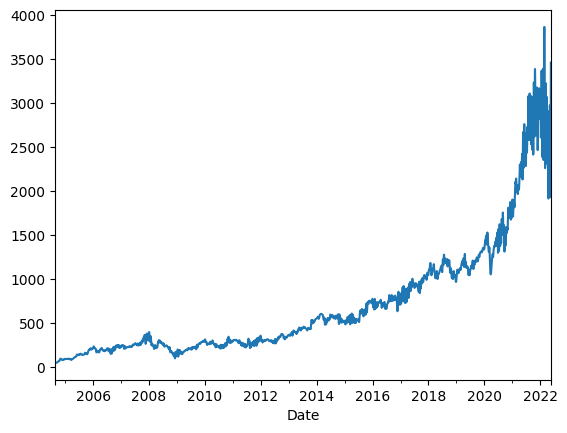

In [269]:
google['Close'].resample('20h').interpolate(method='spline', order=2).plot()

## Rolling Window (Smoothing)
Time series is original format can be quite volatile, especially on smaller aggregation levels. The concept of rolling, or moving averages is a useful technique for smoothing time series data.

<Axes: xlabel='Date'>

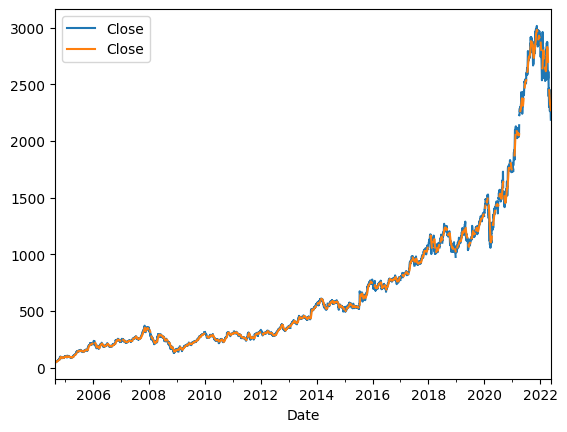

In [292]:
# Rolling window
google['Close'].plot(legend='original')
google['Close'].rolling(10).mean().plot(legend='rolling')

<Axes: xlabel='Date'>

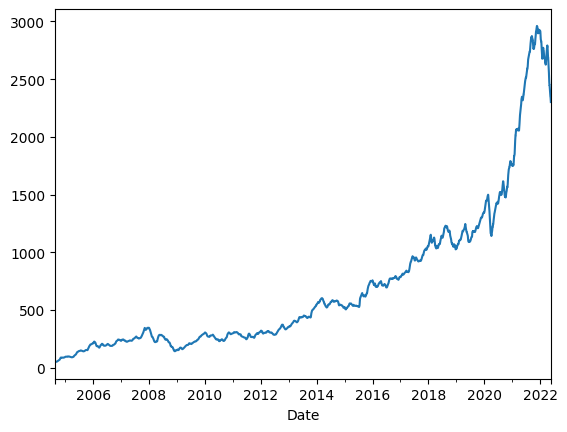

In [290]:
# exponential moving average (weighted)
google['Close'].ewm(7).mean().plot()

# Shifting 
The shift() function in Pandas is used to, well, shift the entire series up or down by the desired number of periods

In [294]:
# shift
yt['Comment_Count'].shift(2)

Published_date
2020-01-17      NaN
2020-01-21      NaN
2020-01-23    140.0
2020-01-25     19.0
2020-01-30    229.0
              ...  
2024-01-17    312.0
2024-01-21    362.0
2024-03-16    192.0
2024-03-23    358.0
2024-04-20    267.0
Name: Comment_Count, Length: 23002, dtype: float64

In [297]:
yt['Comment_Count'].shift(-3).tail()

Published_date
2024-01-17    245.0
2024-01-21    632.0
2024-03-16      NaN
2024-03-23      NaN
2024-04-20      NaN
Name: Comment_Count, dtype: float64

In [321]:
# login dataset
login = pd.read_csv('login.csv', header=None)
print(login.shape)
login.head()

(3003, 4)


,0,1,2,3
0,1,466,2017-01-07 18:24:07,Unnamed: 3
1,2,466,2017-01-07 18:24:55,NaN
2,3,458,2017-01-07 18:25:18,NaN
3,4,458,2017-01-07 18:26:21,NaN
4,5,592,2017-01-07 19:09:59,NaN


In [322]:
df = login[[1, 2]]
df.head()

,1,2
0,466,2017-01-07 18:24:07
1,466,2017-01-07 18:24:55
2,458,2017-01-07 18:25:18
3,458,2017-01-07 18:26:21
4,592,2017-01-07 19:09:59


In [323]:
df.rename(columns={1:'user_id', 2:'login_time'}, inplace=True)
df.head()

C:\Users\15105\AppData\Local\Temp\ipykernel_27248\1468900680.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={1:'user_id', 2:'login_time'}, inplace=True)


,user_id,login_time
0,466,2017-01-07 18:24:07
1,466,2017-01-07 18:24:55
2,458,2017-01-07 18:25:18
3,458,2017-01-07 18:26:21
4,592,2017-01-07 19:09:59


In [332]:
# if we want to calculate average return time of most logged in user
df['user_id'].value_counts().head(2)

user_id
413    222
458    208
Name: count, dtype: int64

In [325]:
user_df = df[df['user_id'] == 413]
user_df.head()

,user_id,login_time
11,413,2017-01-09 12:29:25
12,413,2017-01-09 12:40:39
14,413,2017-01-09 14:08:04
33,413,2017-01-10 14:36:23
35,413,2017-01-10 15:22:45


In [326]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 222 entries, 11 to 2997
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     222 non-null    int64 
 1   login_time  222 non-null    object
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


In [327]:
user_df['login_time'] = pd.to_datetime(user_df['login_time'])
user_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 222 entries, 11 to 2997
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     222 non-null    int64         
 1   login_time  222 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.2 KB


C:\Users\15105\AppData\Local\Temp\ipykernel_27248\4029396625.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df['login_time'] = pd.to_datetime(user_df['login_time'])


In [328]:
user_df['shifted'] = user_df['login_time'].shift(1)
user_df.head()

C:\Users\15105\AppData\Local\Temp\ipykernel_27248\1441154705.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df['shifted'] = user_df['login_time'].shift(1)


,user_id,login_time,shifted
11,413,2017-01-09 12:29:25,NaT
12,413,2017-01-09 12:40:39,2017-01-09 12:29:25
14,413,2017-01-09 14:08:04,2017-01-09 12:40:39
33,413,2017-01-10 14:36:23,2017-01-09 14:08:04
35,413,2017-01-10 15:22:45,2017-01-10 14:36:23


In [331]:
(user_df['login_time'] - user_df['shifted']).mean()

Timedelta('1 days 15:05:13.384615384')